In [ ]:
pip install fastf1

In [16]:
import fastf1
from fastf1 import plotting
import pandas as pd
import os
import matplotlib.pyplot as plt
import os

In [18]:
# Create the cache directory if it doesn't exist
os.makedirs('data/cache', exist_ok=True)

# 🧠 Enable caching (downloads will be saved for future reuse)
fastf1.Cache.enable_cache('data/cache')# Will create 'data/cache/' if it doesn't exist

In [19]:
# 📅 Load a all Grand Prix from 2024
year = 2024
event = 
session_type = 'R'  # 'R' = Race, 'Q' = Qualifying, 'FP1', etc.

print(f"Loading {event} {session_type} session for {year}...")
session = fastf1.get_session(year, event, session_type)
session.load()

Loading Bahrain Grand Prix R session for 2024...


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [30]:
# 🏁 Get lap data
laps = session.laps
laps = session.laps
print(laps.columns)


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


In [45]:
# View the data
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


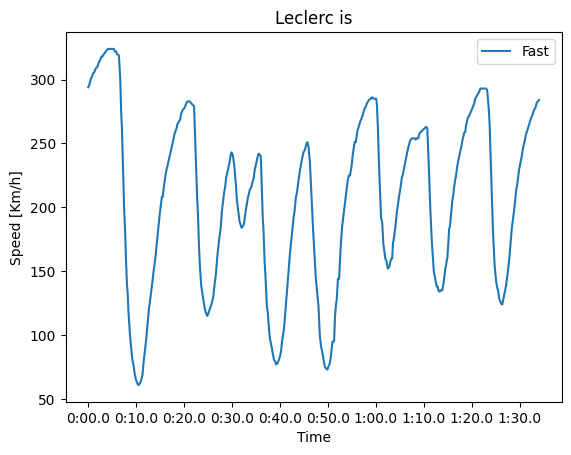

In [29]:
session.load()
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [34]:
# get telemetry for leclerc
all_lap_data = []

# Get all unique drivers
drivers = session.laps['Driver'].unique()

# Loop through each driver
for driver in drivers:
    driver_laps = session.laps.pick_drivers(driver)

    # Loop through each lap for the driver
    for idx, lap in driver_laps.iterrows():
        try:
            # Get telemetry and add useful info
            car_data = lap.get_car_data().add_distance()
            car_data['Driver'] = driver
            car_data['LapNumber'] = lap['LapNumber']

            all_lap_data.append(car_data)
        except Exception as e:
            print(f"Error processing lap {lap['LapNumber']} for driver {driver}: {e}")

In [36]:
# Combine all lap data into a single DataFrame
all_lap_data_df = pd.concat(all_lap_data, ignore_index=True)

In [51]:
all_lap_data_df.tail(10)


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,Driver,LapNumber
413004,2024-03-02 16:35:45.527,12138.0,257.0,6,100.0,False,0,car,0 days 00:01:33.572000,0 days 02:32:03.096000,5151.757778,SAR,55.0
413005,2024-03-02 16:35:45.766,11454.0,259.0,6,100.0,False,0,car,0 days 00:01:33.811000,0 days 02:32:03.335000,5168.952500,SAR,55.0
413006,2024-03-02 16:35:45.966,10853.0,262.0,7,100.0,False,0,car,0 days 00:01:34.011000,0 days 02:32:03.535000,5183.508056,SAR,55.0
413007,2024-03-02 16:35:46.246,10975.0,266.0,7,100.0,False,0,car,0 days 00:01:34.291000,0 days 02:32:03.815000,5204.196944,SAR,55.0
413008,2024-03-02 16:35:46.526,11091.0,269.0,7,100.0,False,0,car,0 days 00:01:34.571000,0 days 02:32:04.095000,5225.119167,SAR,55.0
413009,2024-03-02 16:35:46.686,11191.0,271.0,7,100.0,False,0,car,0 days 00:01:34.731000,0 days 02:32:04.255000,5237.163611,SAR,55.0
413010,2024-03-02 16:35:46.966,11322.0,273.0,7,100.0,False,0,car,0 days 00:01:35.011000,0 days 02:32:04.535000,5258.396944,SAR,55.0
413011,2024-03-02 16:35:47.486,11497.0,278.0,7,100.0,False,0,car,0 days 00:01:35.531000,0 days 02:32:05.055000,5298.552500,SAR,55.0
413012,2024-03-02 16:35:47.646,11509.0,280.0,7,100.0,False,0,car,0 days 00:01:35.691000,0 days 02:32:05.215000,5310.996944,SAR,55.0
413013,2024-03-02 16:35:48.087,11638.0,282.0,7,100.0,False,0,car,0 days 00:01:36.132000,0 days 02:32:05.656000,5345.541944,SAR,55.0


In [53]:
# Get columns for all_lap_data_df
print(all_lap_data_df.columns)

Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Time', 'SessionTime', 'Distance', 'Driver', 'LapNumber'],
      dtype='object')


In [55]:
# Obtain shape of the DataFrame
all_lap_data_df.shape

(413014, 13)

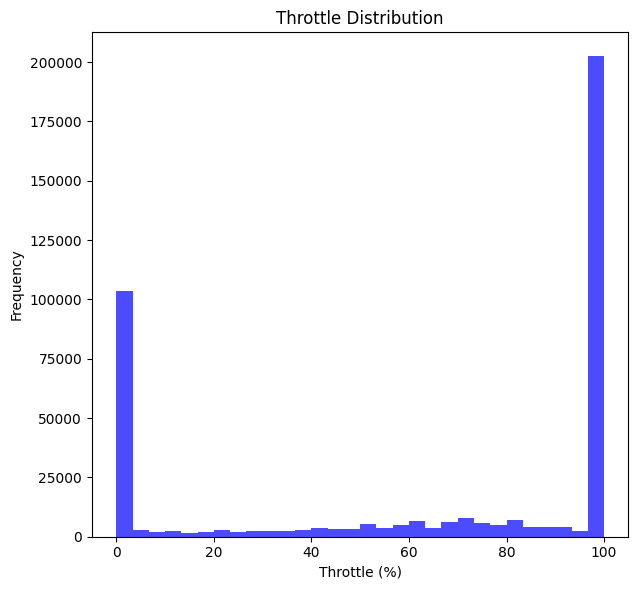

In [49]:
# Plot histogram for throttle 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(all_lap_data_df['Throttle'], bins=30, color='blue', alpha=0.7)
plt.title('Throttle Distribution')
plt.xlabel('Throttle (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



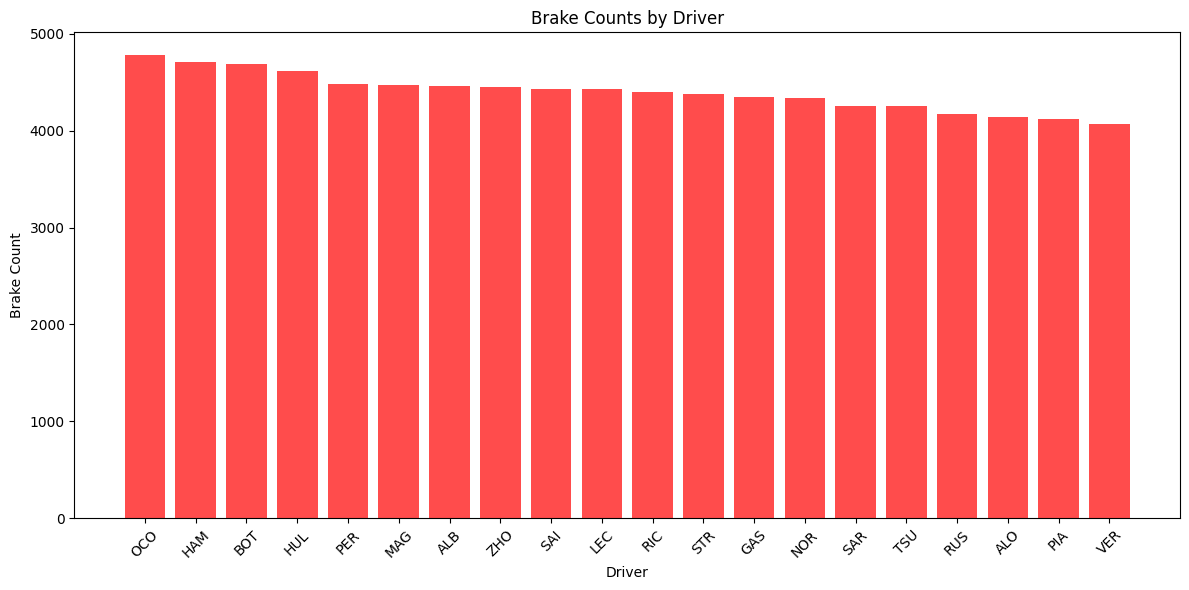

In [50]:
# count Brake for evry driver
brake_counts = all_lap_data_df.groupby('Driver')['Brake'].apply(lambda x: (x > 0).sum()).reset_index()
brake_counts.columns = ['Driver', 'BrakeCount']
# Sort by BrakeCount
brake_counts = brake_counts.sort_values(by='BrakeCount', ascending=False)
# Plot the brake counts
plt.figure(figsize=(12, 6))
plt.bar(brake_counts['Driver'], brake_counts['BrakeCount'], color='red', alpha=0.7)
plt.title('Brake Counts by Driver')
plt.xlabel('Driver')
plt.ylabel('Brake Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


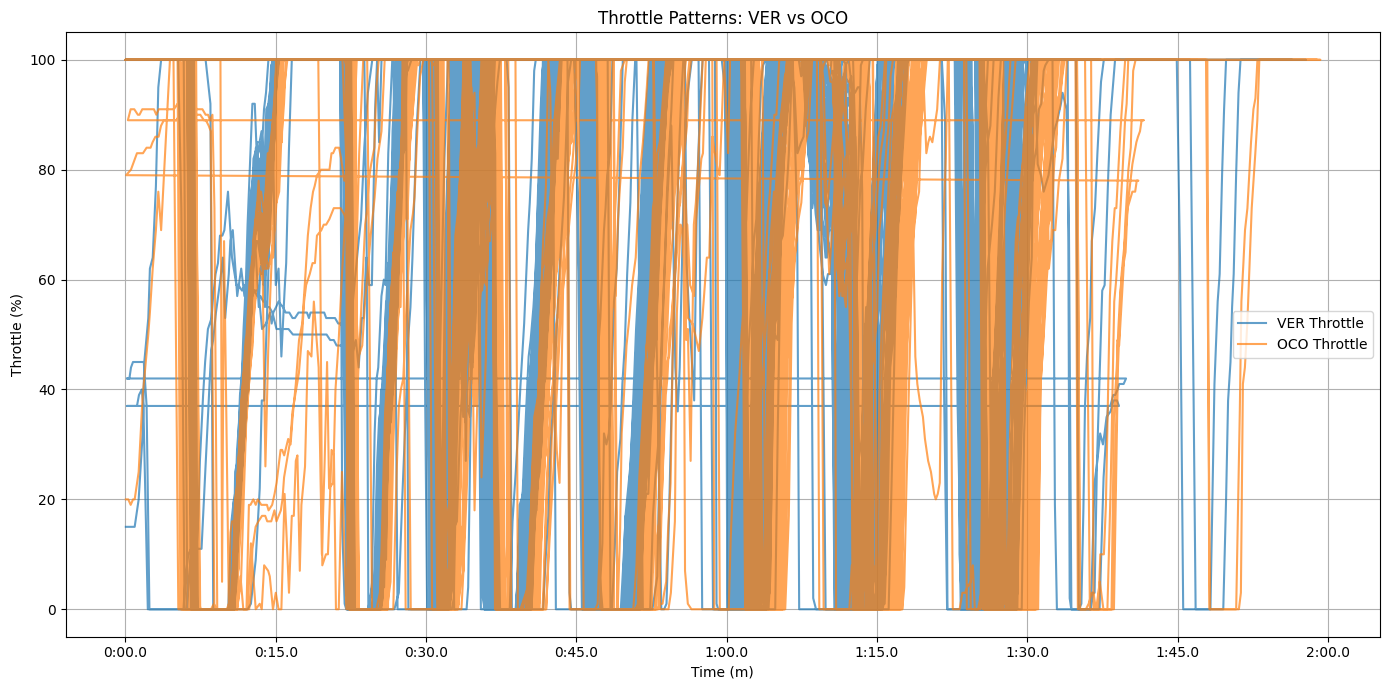

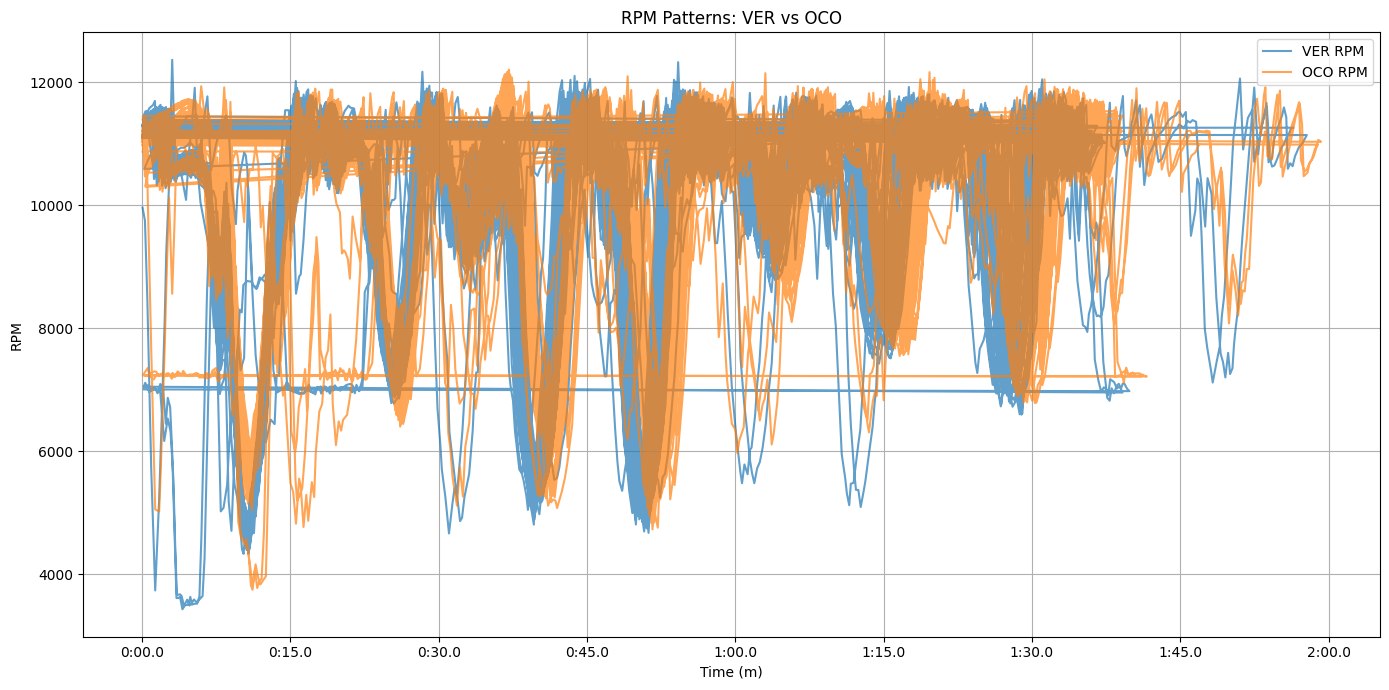

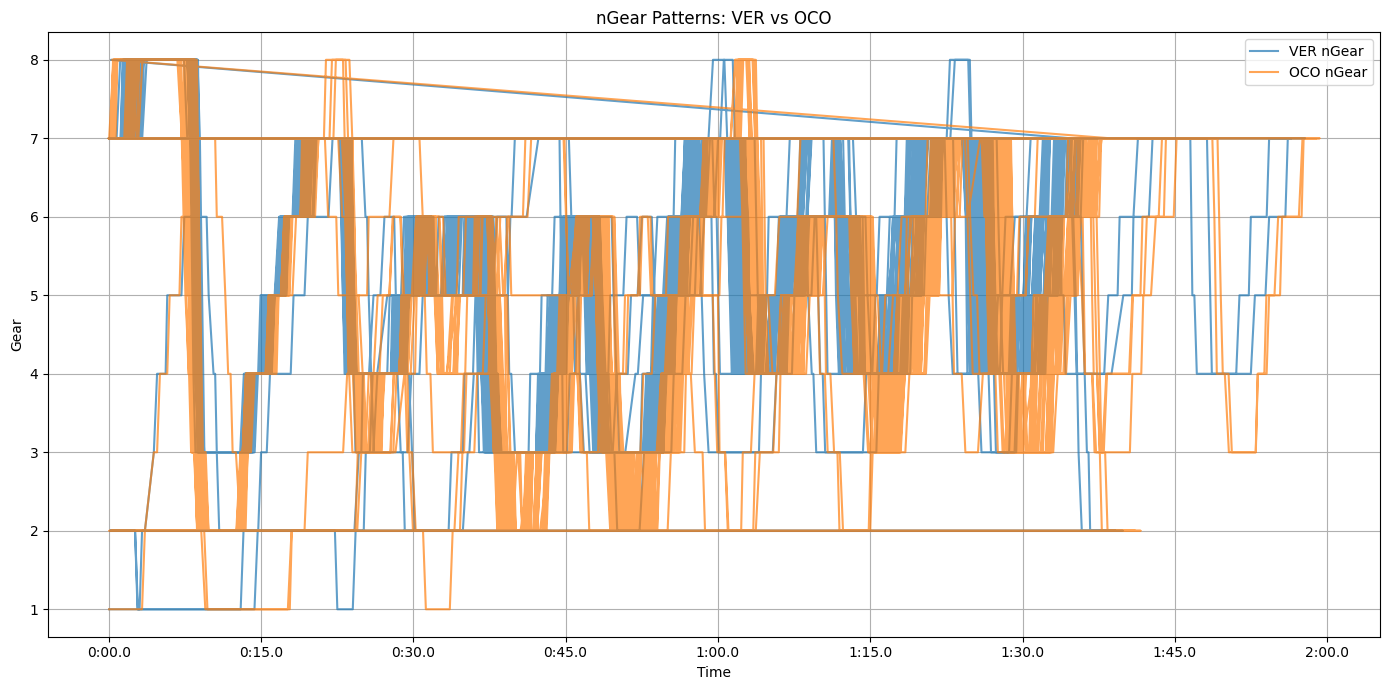

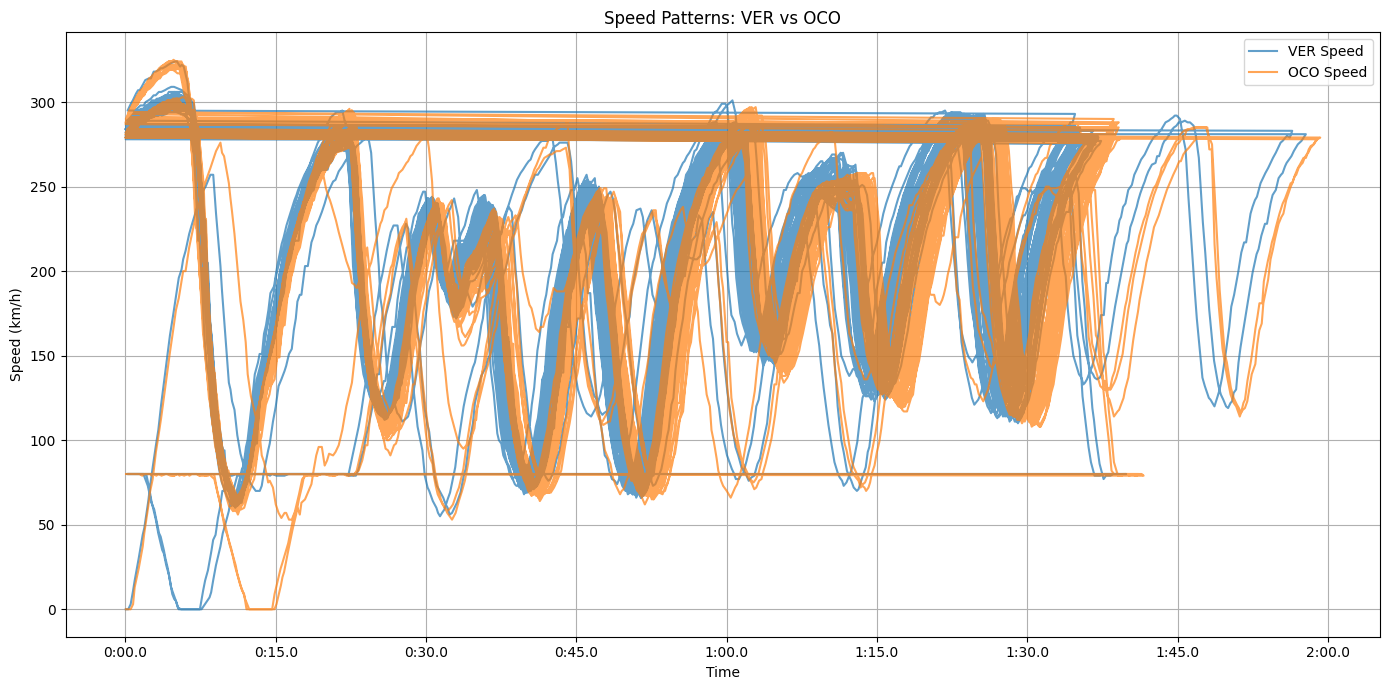

In [88]:
# Compare throttle patterns of VER vs. OCO
ver_laps = all_lap_data_df[all_lap_data_df['Driver'] == 'VER']
oco_laps = all_lap_data_df[all_lap_data_df['Driver'] == 'OCO']
plt.figure(figsize=(14, 7))
plt.plot(ver_laps['Time'], ver_laps['Throttle'], label='VER Throttle', alpha=0.7)
plt.plot(oco_laps['Time'], oco_laps['Throttle'], label='OCO Throttle', alpha=0.7)
plt.title('Throttle Patterns: VER vs OCO')
plt.xlabel('Time (m)')
plt.ylabel('Throttle (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Compare RPM for VER vs OCO
plt.figure(figsize=(14, 7))
plt.plot(ver_laps['Time'], ver_laps['RPM'], label='VER RPM', alpha=0.7)
plt.plot(oco_laps['Time'], oco_laps['RPM'], label='OCO RPM', alpha=0.7)
plt.title('RPM Patterns: VER vs OCO')
plt.xlabel('Time (m)')
plt.ylabel('RPM')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Compare nGear for VER vs OCO
plt.figure(figsize=(14, 7))
plt.plot(ver_laps['Time'], ver_laps['nGear'], label='VER nGear', alpha=0.7)
plt.plot(oco_laps['Time'], oco_laps['nGear'], label='OCO nGear', alpha=0.7)
plt.title('nGear Patterns: VER vs OCO')
plt.xlabel('Time')
plt.ylabel('Gear')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Compare Speed for VER vs OCO
plt.figure(figsize=(14, 7))
plt.plot(ver_laps['Time'], ver_laps['Speed'], label='VER Speed', alpha=0.7)
plt.plot(oco_laps['Time'], oco_laps['Speed'], label='OCO Speed', alpha=0.7)
plt.title('Speed Patterns: VER vs OCO')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [94]:
driver_map = session.laps[['Driver', 'DriverNumber']].drop_duplicates()
# session.results is indexed by DriverNumber
# driver_map maps DriverNumber → Driver (3-letter code)
results = session.results[['Position']].join(driver_map.set_index('DriverNumber'))


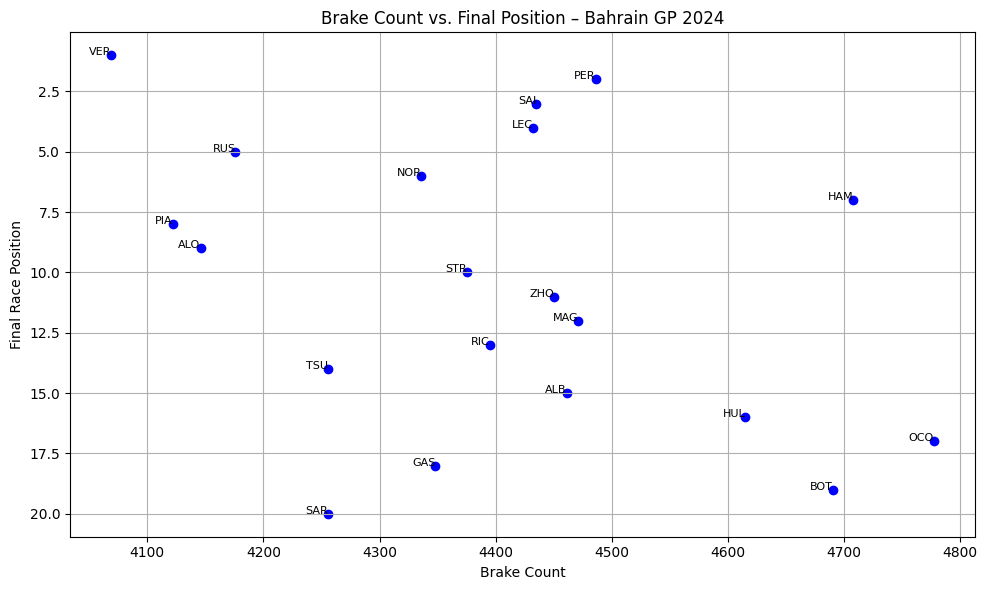

In [101]:
# 1. Brake counts from telemetry
brake_counts = all_lap_data_df[all_lap_data_df['Brake']].groupby('Driver').size()
brake_counts.name = 'BrakeCount'  # give it a name for merging

# 2. Extract position and abbreviation
results = session.results[['Abbreviation', 'Position']].copy()

# 3. Set Abbreviation as index to match brake_counts index
results.set_index('Abbreviation', inplace=True)

# 4. Merge
brake_vs_position = brake_counts.to_frame().join(results)

# 5. Drop missing entries
brake_vs_position.dropna(inplace=True)

# 6. Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(brake_vs_position['BrakeCount'], brake_vs_position['Position'], color='blue')

# Optional: add labels
for driver, row in brake_vs_position.iterrows():
    plt.text(row['BrakeCount'], row['Position'], driver, fontsize=8, ha='right')

plt.xlabel('Brake Count')
plt.ylabel('Final Race Position')
plt.title('Brake Count vs. Final Position – Bahrain GP 2024')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
brake_counts.head(20)

Driver
ALB    4461
ALO    4146
BOT    4690
GAS    4348
HAM    4708
HUL    4615
LEC    4432
MAG    4471
NOR    4336
OCO    4777
PER    4486
PIA    4122
RIC    4395
RUS    4176
SAI    4435
SAR    4256
STR    4375
TSU    4256
VER    4069
ZHO    4450
dtype: int64

In [96]:
session.results[['Position']].head(20)


,Position
1,1.0
11,2.0
55,3.0
16,4.0
63,5.0
4,6.0
44,7.0
81,8.0
14,9.0
18,10.0


In [100]:
session.results.head()



,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671c6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,1.0,NaT,NaT,NaT,0 days 01:31:44.742000,Finished,26.0,57.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671c6,red_bull,Sergio,Perez,Sergio Perez,...,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:22.457000,Finished,18.0,57.0
55,55,C SAINZ,SAI,sainz,Ferrari,e8002d,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,4.0,NaT,NaT,NaT,0 days 00:00:25.110000,Finished,15.0,57.0
16,16,C LECLERC,LEC,leclerc,Ferrari,e8002d,ferrari,Charles,Leclerc,Charles Leclerc,...,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:39.669000,Finished,12.0,57.0
63,63,G RUSSELL,RUS,russell,Mercedes,27f4d2,mercedes,George,Russell,George Russell,...,5.0,5,3.0,NaT,NaT,NaT,0 days 00:00:46.788000,Finished,10.0,57.0


/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(


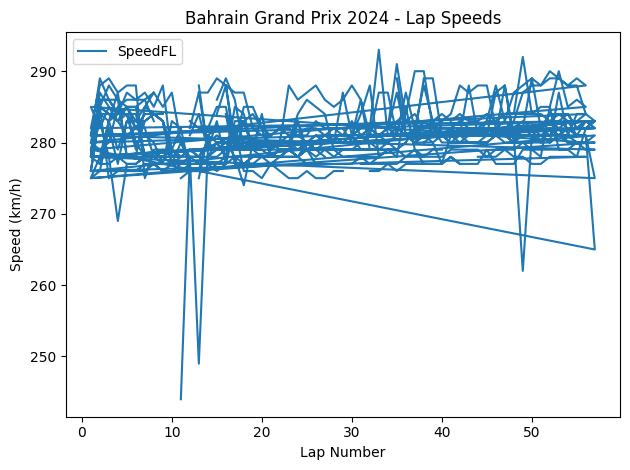

In [25]:

# Plot the lap data
plotting.setup_mpl(misc_mpl_mods=False)  # Setup matplotlib for FastF1
laps.plot(x='LapNumber', y='SpeedFL', kind='line', title=f'{event} {year} - Lap Speeds', xlabel='Lap Number', ylabel='Speed (km/h)')
plt.tight_layout()
plt.show()


In [108]:
from fastf1 import get_event_schedule

schedule = get_event_schedule(2024)
race_names = schedule[schedule['EventFormat'] != 'Sprint']['EventName'].tolist()


events      WARNING 	Correcting user input 'Pre-Season Testing' to 'Singapore Grand Prix'
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24'

Skipped Pre-Season Testing: [Errno 28] No space left on device: '../outputs/Pre-Season_Testing_brake_vs_position.png'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packa

Skipped Bahrain Grand Prix: [Errno 28] No space left on device: '../outputs/Bahrain_Grand_Prix_brake_vs_position.png'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packa

Skipped Saudi Arabian Grand Prix: [Errno 28] No space left on device: '../outputs/Saudi_Arabian_Grand_Prix_brake_vs_position.png'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/f

Skipped Australian Grand Prix: [Errno 28] No space left on device: '../outputs/Australian_Grand_Prix_brake_vs_position.png'


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packa

Skipped Japanese Grand Prix: [Errno 28] No space left on device: '../outputs/Japanese_Grand_Prix_brake_vs_position.png'


req            INFO 	Updating cache for car_data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
logger      WARNING 	Failed to load telemetry data!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
logger      WARNING 	Failed to load weather data!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
logger      WARNING 	Failed to load race control messages!
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in 

Skipped Chinese Grand Prix: No objects to concatenate


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Miami Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Emilia Romagna Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Monaco Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Canadian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Spanish Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Austrian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped British Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Hungarian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Belgian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Dutch Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Italian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req      

Skipped Azerbaijan Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/daikiishiyama/Desktop/MyAlgo/venv/lib/python3.13/site-pack

Skipped Singapore Grand Prix: [Errno 28] No space left on device: '../outputs/Singapore_Grand_Prix_brake_vs_position.png'


logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!


Skipped United States Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped Mexico City Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!


Skipped São Paulo Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!
logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
events      WARNING 	Correcting user input 'Qatar Grand Prix' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended dri

Skipped Las Vegas Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.6.0]
logger      WARNING 	Failed to load session info data!
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
logger      WARNING 	Failed to load session status data!
logger      WARNING 	Failed to load total lap count!
logger      WARNING 	Failed to load track status data!
logger      WARNING 	Failed to load timing data!


Skipped Qatar Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to add first lap time from Ergast!
logger      WARNING 	Failed to load telemetry data!
logger      WARNING 	Failed to load weather data!
logger      WARNING 	Failed to load race control messages!
core           INFO 	Finished loading data for 0 drivers: []


Skipped Abu Dhabi Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


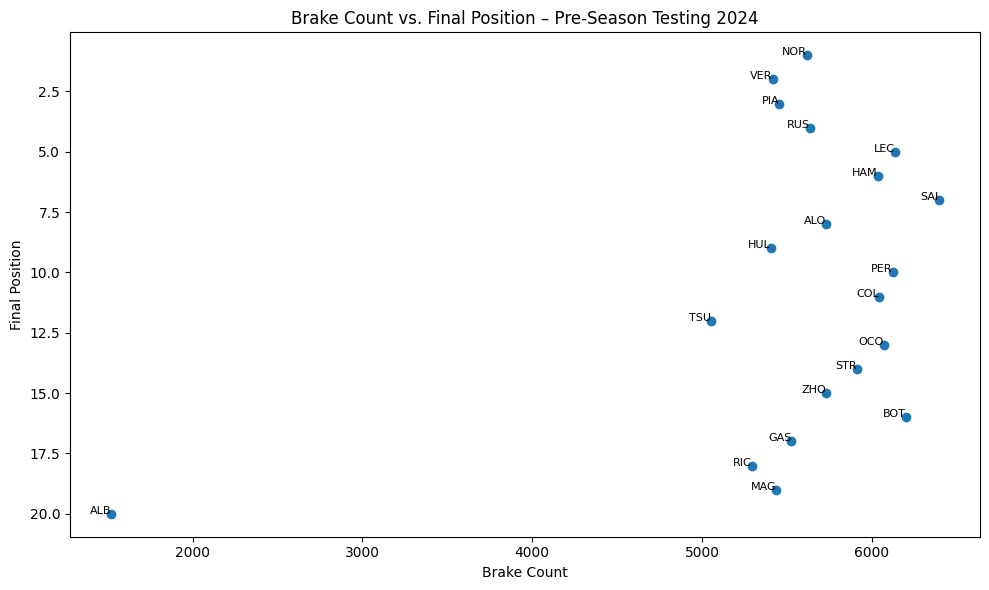

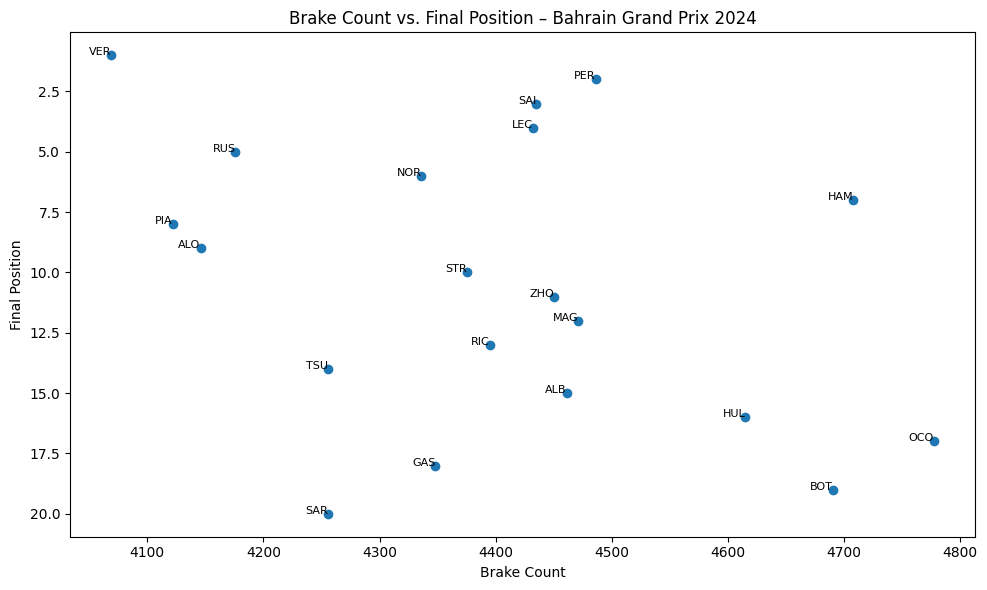

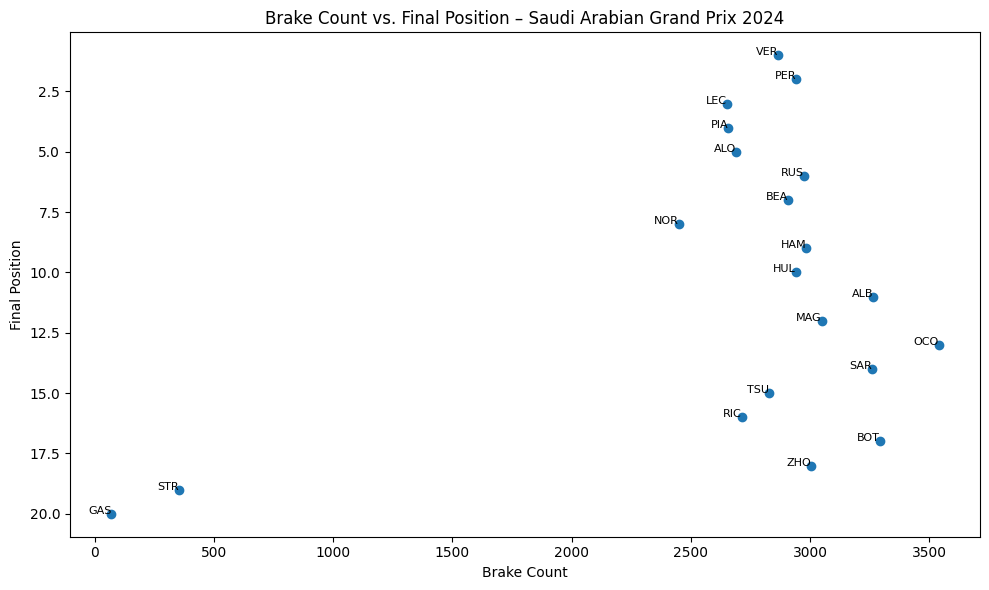

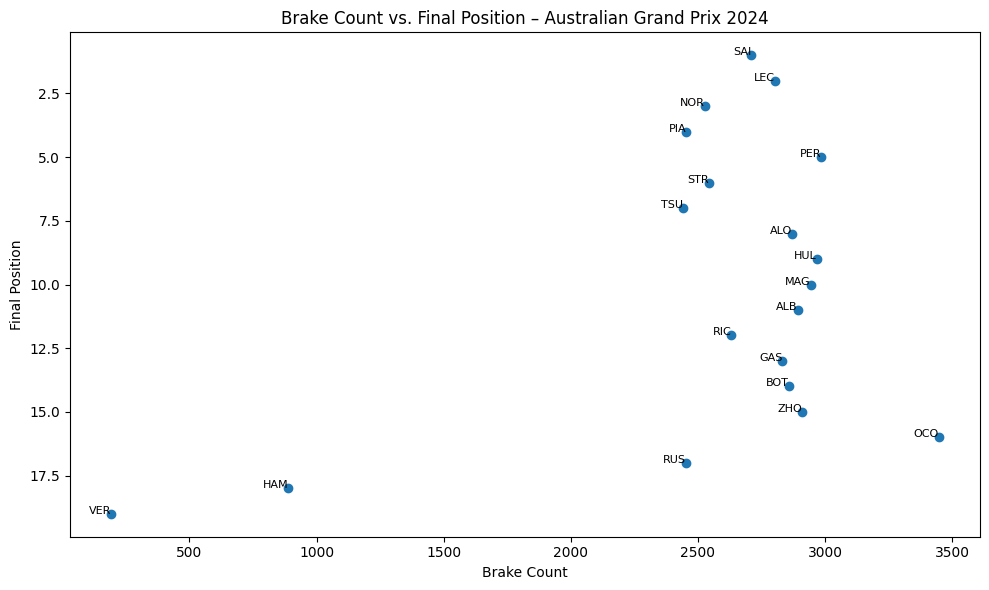

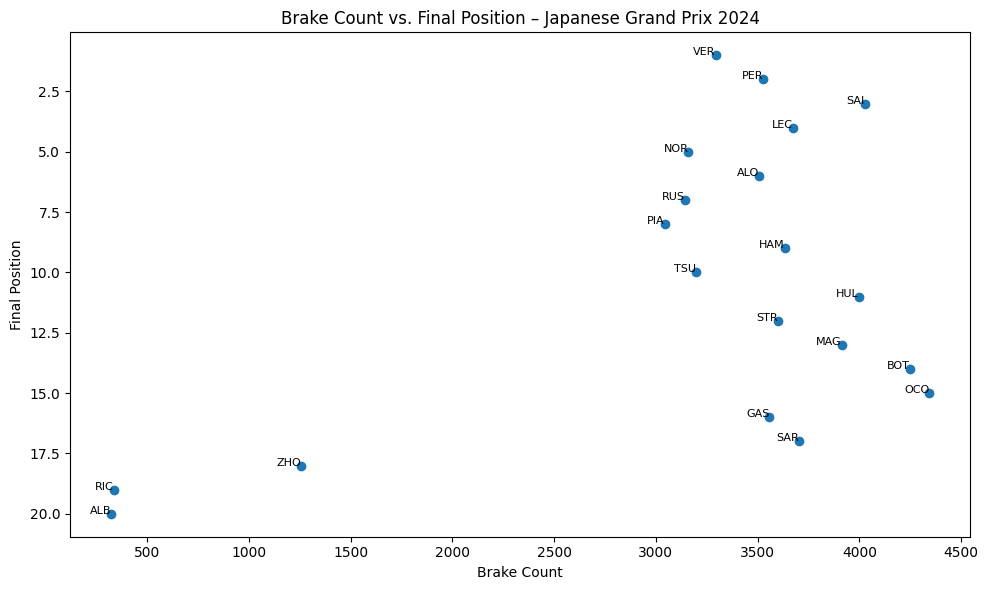

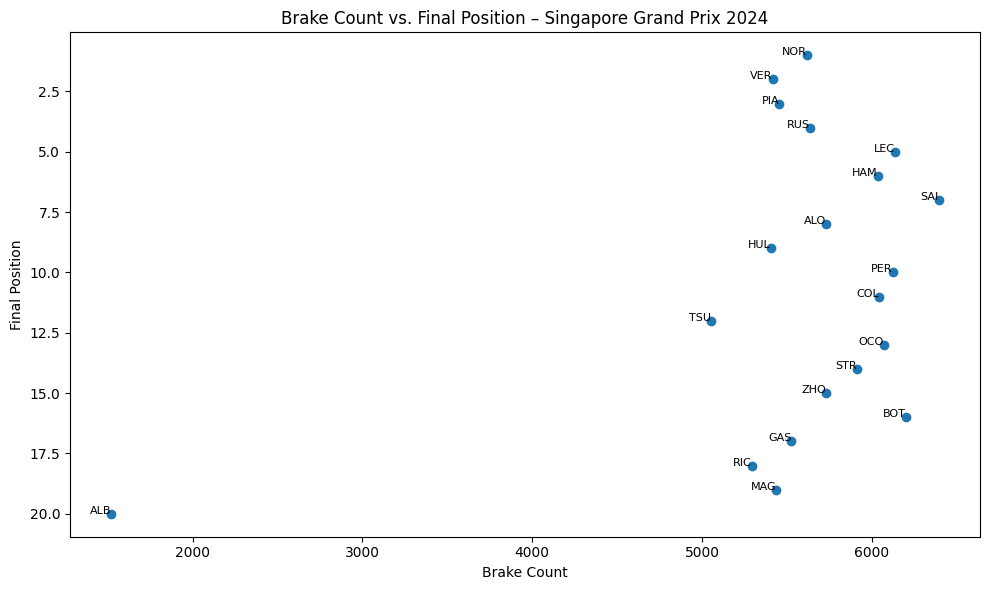

In [110]:
for event in race_names:
    try:
        session = fastf1.get_session(2024, event, 'R')
        session.load()

        # brake count
        laps = session.laps
        all_telemetry = []
        for driver in laps['Driver'].unique():
            for _, lap in laps.pick_driver(driver).iterrows():
                try:
                    tele = lap.get_car_data().add_distance()
                    tele['Driver'] = driver
                    all_telemetry.append(tele)
                except:
                    continue
        df = pd.concat(all_telemetry, ignore_index=True)
        brake_counts = df[df['Brake']].groupby('Driver').size().rename('BrakeCount')

        # results
        results = session.results[['Abbreviation', 'Position']].set_index('Abbreviation')

        # join and plot
        joined = brake_counts.to_frame().join(results).dropna()

        # Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(joined['BrakeCount'], joined['Position'])
        for driver, row in joined.iterrows():
            plt.text(row['BrakeCount'], row['Position'], driver, fontsize=8, ha='right')
        plt.title(f"Brake Count vs. Final Position – {event} 2024")
        plt.xlabel('Brake Count')
        plt.ylabel('Final Position')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(f'../outputs/{event.replace(" ", "_")}_brake_vs_position.png')
        plt.close()

    except Exception as e:
        print(f"Skipped {event}: {e}")


In [ ]:
# Save lap data to CSV
laps.to_csv('data/laps_bahrain_2023.csv', index=False)
print("✅ Lap data saved to 'data/laps_bahrain_2023.csv'")

In [ ]:
# 🚗 Get telemetry data for a specific driver (e.g., VER)
driver = 'VER'
ver_laps = laps.pick_driver(driver)
fastest_ver_lap = ver_laps.pick_fastest()
telemetry = fastest_ver_lap.get_car_data().add_distance()

In [ ]:
# 📊 Plot telemetry speed over distance
plt.figure(figsize=(10, 5))
plt.plot(telemetry['Distance'], telemetry['Speed'], label='Speed (km/h)')
plt.title(f'{driver} – Fastest Lap Speed Profile – {event} {year}')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
telemetry.to_csv(f'data/{driver}_telemetry_bahrain_2023.csv', index=False)
print(f"✅ Telemetry for {driver} saved to 'data/{driver}_telemetry_bahrain_2023.csv'")
